# Challenge project January 2021 // Anna Rahl

<b>Challenge together with class mates in the Data Analyst program (Hyper Island) to explore unknown dataset and present insights to each other. Helping us practice skills such as programming as well as intuition and business understanding.</b>

<b>Data from Kaggle:</b> Trending YouTube Video Statistics - https://www.kaggle.com/datasnaek/youtube-new?select=CAvideos.csv

Data: DEvideos.csv and DE_category_id.json

Tools: Python/Jupyter Notebook

<b>My mission in this challenge:</b> Looking to help German influencers looking to boost their precense on Youtube

Question 1: What time of the day should you publish your content?

Question 2: What categories are getting the most interactions?

(Question 3: What % of videos was trending after one day?)



<b>Conclusion at the end</b>

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [207]:
data = pd.read_csv('C:/Users/annar/OneDrive/Skrivbord/Project 6 Math and Stats/DA22 Challenge/DEvideos.csv/DEvideos.csv')

Exploring the dataset

In [208]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...


In [209]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40840.000000,4.084000e+04,4.084000e+04,4.084000e+04,4.084000e+04
mean,20.705828,6.034553e+05,2.187550e+04,1.397136e+03,2.785857e+03
std,6.975813,2.348963e+06,1.018000e+05,1.457738e+04,1.745803e+04
min,1.000000,5.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,2.706875e+04,5.330000e+02,2.900000e+01,7.900000e+01
50%,24.000000,1.192770e+05,2.699000e+03,1.340000e+02,3.760000e+02
75%,24.000000,4.431015e+05,1.179625e+04,5.320000e+02,1.376000e+03
max,44.000000,1.138762e+08,4.924056e+06,1.470386e+06,1.084435e+06


In [210]:
data.count()

video_id                  40840
trending_date             40840
title                     40840
channel_title             40840
category_id               40840
publish_time              40840
tags                      40840
views                     40840
likes                     40840
dislikes                  40840
comment_count             40840
thumbnail_link            40840
comments_disabled         40840
ratings_disabled          40840
video_error_or_removed    40840
description               39288
dtype: int64

Is there a relation between publish time (in hours) and no of views?

In [212]:
data['publish_time']

0        2017-11-13T17:08:49.000Z
1        2017-11-12T22:30:01.000Z
2        2017-11-13T07:30:00.000Z
3        2017-11-12T15:00:01.000Z
4        2017-11-12T13:10:36.000Z
                   ...           
40835    2018-06-12T01:54:02.000Z
40836    2018-06-13T21:58:43.000Z
40837    2018-06-12T10:01:28.000Z
40838    2018-06-11T21:16:55.000Z
40839    2018-06-13T15:02:15.000Z
Name: publish_time, Length: 40840, dtype: object

In [213]:
data[['date', 'time']] = data['publish_time'].str.split('T', expand=True)

In [214]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,date,time
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,2017-11-13,17:08:49.000Z
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,2017-11-12,22:30:01.000Z
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,07:30:00.000Z
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,2017-11-12,15:00:01.000Z
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,2017-11-12,13:10:36.000Z


In [215]:
data[['Time_of_day', 'rest_time']] = data['time'].str.split(':', n=1, expand=True)

In [216]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,date,time,Time_of_day,rest_time
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,2017-11-13,17:08:49.000Z,17,08:49.000Z
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,2017-11-12,22:30:01.000Z,22,30:01.000Z
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,07:30:00.000Z,07,30:00.000Z
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,2017-11-12,15:00:01.000Z,15,00:01.000Z
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,2017-11-12,13:10:36.000Z,13,10:36.000Z


In [224]:
time_views = data.groupby(['Time_of_day'])['views'].sum().reset_index()
time_views

,Time_of_day,views
0,00,406145353
1,01,668404303
2,02,447802567
3,03,727519197
4,04,1154292472
5,05,1254685364
6,06,575174785
7,07,561765089
8,08,670367460
9,09,824016776


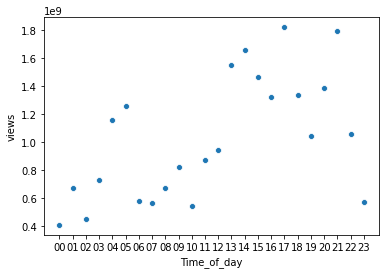

In [225]:
sns.scatterplot(x='Time_of_day', y='views', data=time_views)
plt.show()

In [226]:
time_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time_of_day  24 non-null     object
 1   views        24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [227]:
time_views['Time_of_day'] = time_views['Time_of_day'].astype(int)
time_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Time_of_day  24 non-null     int32
 1   views        24 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 416.0 bytes


In [228]:
print(time_views['Time_of_day'].corr(time_views['views']))

0.5687195096852204


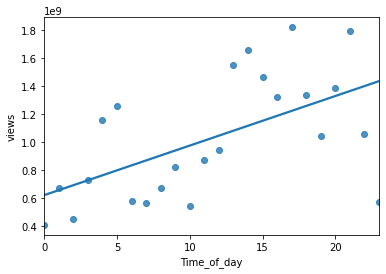

In [229]:
sns.regplot(x='Time_of_day', y='views', data=time_views, ci=None)
plt.show()

In [230]:
large_time_views = time_views[time_views['views'] > 1040000000]
large_time_views.sort_values('views')

,Time_of_day,views
19,19,1041968807
22,22,1054046352
4,4,1154292472
5,5,1254685364
16,16,1323857605
18,18,1336196729
20,20,1386636726
15,15,1466949399
13,13,1546602997
14,14,1658926060


What categories have the most interactions (likes + dislikes)?

In [120]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,Test,Test_2,inbtw_step,Time_of_day,date,time,rest_time
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,...,False,False,Heute gibt es mal wieder ein neues Format... w...,17:08:49.000Z,17,2017-11-13,17,2017-11-13,17:08:49.000Z,08:49.000Z
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,...,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,17:08:49.000Z,17,2017-11-12,22,2017-11-12,22:30:01.000Z,30:01.000Z
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,...,False,False,"One year after the presidential election, John...",17:08:49.000Z,17,2017-11-13,07,2017-11-13,07:30:00.000Z,30:00.000Z
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,...,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,17:08:49.000Z,17,2017-11-12,15,2017-11-12,15:00:01.000Z,00:01.000Z
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,...,False,False,18 Song Mashup über den (veränderten) Beat von...,17:08:49.000Z,17,2017-11-12,13,2017-11-12,13:10:36.000Z,10:36.000Z


In [251]:
data['total_interaction'] = data['likes'] + data['dislikes']
data['total_interaction']

0         36115
1         53878
2        103336
3         32279
4        103151
          ...  
40835     47279
40836     11274
40837       375
40838     16321
40839     11746
Name: total_interaction, Length: 40840, dtype: int64

In [186]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,total_interaction
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,36115
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,53878
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",103336
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,32279
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,103151


In [187]:
data.describe()

,category_id,views,likes,dislikes,comment_count,total_interaction
count,40840.000000,4.084000e+04,4.084000e+04,4.084000e+04,4.084000e+04,4.084000e+04
mean,20.705828,6.034553e+05,2.187550e+04,1.397136e+03,2.785857e+03,2.327264e+04
std,6.975813,2.348963e+06,1.018000e+05,1.457738e+04,1.745803e+04,1.092777e+05
min,1.000000,5.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,2.706875e+04,5.330000e+02,2.900000e+01,7.900000e+01,5.810000e+02
50%,24.000000,1.192770e+05,2.699000e+03,1.340000e+02,3.760000e+02,2.960000e+03
75%,24.000000,4.431015e+05,1.179625e+04,5.320000e+02,1.376000e+03,1.267625e+04
max,44.000000,1.138762e+08,4.924056e+06,1.470386e+06,1.084435e+06,5.080082e+06


In [247]:
datagroupbycategory_2 = data.groupby(['category_id'], axis=0)['total_interaction'].sum()
datagroupbycategory_2

category_id
1      47180422
2       6326067
10    313282254
15      3432971
17     39800178
19       917539
20     30852738
22     65464215
23     77345266
24    290237806
25     16761491
26     15841168
27      7750946
28     16110033
29     18607445
30        66428
43       477602
44            0
Name: total_interaction, dtype: int64

In [253]:
data_groupbycategory = data.groupby(['category_id'])['total_interaction'].sum()
data_groupbycategory = data_groupbycategory.sort_values()
data_groupbycategory

category_id
44            0
30        66428
43       477602
19       917539
15      3432971
2       6326067
27      7750946
26     15841168
28     16110033
25     16761491
29     18607445
20     30852738
17     39800178
1      47180422
22     65464215
23     77345266
24    290237806
10    313282254
Name: total_interaction, dtype: int64

In [202]:
print(data['total_interaction'].corr(data['comment_count']))

0.8798180667675658


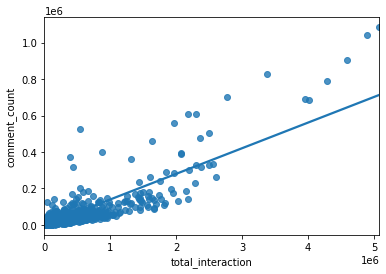

In [142]:
sns.regplot(x='total_interaction', y='comment_count', data=data, ci=None)
plt.show()

In [136]:
with open('C:/Users/annar/OneDrive/Skrivbord/Project 6 Math and Stats/DA22 Challenge/DE_category_id.json') as categories:
    categories_dict = json.load(categories)

categories_dict

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

What's the fastest trending video?

In [231]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,date,time,Time_of_day,rest_time
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,2017-11-13,17:08:49.000Z,17,08:49.000Z
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,2017-11-12,22:30:01.000Z,22,30:01.000Z
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,07:30:00.000Z,07,30:00.000Z
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,2017-11-12,15:00:01.000Z,15,00:01.000Z
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,2017-11-12,13:10:36.000Z,13,10:36.000Z


In [238]:
data['trending_date']

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
40835    18.14.06
40836    18.14.06
40837    18.14.06
40838    18.14.06
40839    18.14.06
Name: trending_date, Length: 40840, dtype: object

In [239]:
data['date']

0        2017-11-13
1        2017-11-12
2        2017-11-13
3        2017-11-12
4        2017-11-12
            ...    
40835    2018-06-12
40836    2018-06-13
40837    2018-06-12
40838    2018-06-11
40839    2018-06-13
Name: date, Length: 40840, dtype: object

In [255]:
data['trending_date_datetime'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')
data['trending_date_datetime']

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
40835   2018-06-14
40836   2018-06-14
40837   2018-06-14
40838   2018-06-14
40839   2018-06-14
Name: trending_date_datetime, Length: 40840, dtype: datetime64[ns]

In [258]:
data['date_datetime'] = pd.to_datetime(data['date'])
data['date_datetime']

0       2017-11-13
1       2017-11-12
2       2017-11-13
3       2017-11-12
4       2017-11-12
           ...    
40835   2018-06-12
40836   2018-06-13
40837   2018-06-12
40838   2018-06-11
40839   2018-06-13
Name: date_datetime, Length: 40840, dtype: datetime64[ns]

In [260]:
data['fast_trend'] = data['trending_date_datetime'] - data['date_datetime']
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,description,date,time,Time_of_day,rest_time,total_interaction,trending_date_datetime,date_datetime,fast_trend
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,...,False,Heute gibt es mal wieder ein neues Format... w...,2017-11-13,17:08:49.000Z,17,08:49.000Z,36115,2017-11-14,2017-11-13,1 days
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,...,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,2017-11-12,22:30:01.000Z,22,30:01.000Z,53878,2017-11-14,2017-11-12,2 days
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,...,False,"One year after the presidential election, John...",2017-11-13,07:30:00.000Z,07,30:00.000Z,103336,2017-11-14,2017-11-13,1 days
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,...,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,2017-11-12,15:00:01.000Z,15,00:01.000Z,32279,2017-11-14,2017-11-12,2 days
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,...,False,18 Song Mashup über den (veränderten) Beat von...,2017-11-12,13:10:36.000Z,13,10:36.000Z,103151,2017-11-14,2017-11-12,2 days


In [261]:
data['fast_trend'].describe()

count                         40840
mean      1 days 20:24:27.502448579
std      19 days 14:55:06.968005354
min                 0 days 00:00:00
25%                 1 days 00:00:00
50%                 1 days 00:00:00
75%                 2 days 00:00:00
max              2046 days 00:00:00
Name: fast_trend, dtype: object

In [264]:
data[data['fast_trend']== '1 days']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,description,date,time,Time_of_day,rest_time,total_interaction,trending_date_datetime,date_datetime,fast_trend
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,...,False,Heute gibt es mal wieder ein neues Format... w...,2017-11-13,17:08:49.000Z,17,08:49.000Z,36115,2017-11-14,2017-11-13,1 days
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,...,False,"One year after the presidential election, John...",2017-11-13,07:30:00.000Z,07,30:00.000Z,103336,2017-11-14,2017-11-13,1 days
5,xapGFgWqtg4,17.14.11,Geld verdienen mit Online-Umfragen? Geht das w...,Die Allestester,22,2017-11-13T01:49:24.000Z,[none],32709,3093,296,...,False,Wir haben Meinungsstudie.de (► http://bit.ly/2...,2017-11-13,01:49:24.000Z,01,49:24.000Z,3389,2017-11-14,2017-11-13,1 days
6,EIM7RMe39JY,17.14.11,Kanaken auf der Klassenfahrt,Bodyformus,23,2017-11-13T11:59:04.000Z,"kanaken|""kurden""|""türken""|""schule""|""schulzeit""...",308683,35704,578,...,False,Video mit Planet Kanax: https://youtu.be/3U51c...,2017-11-13,11:59:04.000Z,11,59:04.000Z,36282,2017-11-14,2017-11-13,1 days
7,PaWTaj6Iie0,17.14.11,3 unbekannte Gesichter von Film/Serien-Charakt...,Jay & Arya,22,2017-11-13T18:09:55.000Z,"unbekannte gesichte charakter|""unbekannte gesi...",181660,17998,169,...,False,4 unbekannte Gesichter animierter Charaktere (...,2017-11-13,18:09:55.000Z,18,09:55.000Z,18167,2017-11-14,2017-11-13,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40832,6wb8rqDeMlU,18.14.06,FarmVLOG#120 - Heu rein...Gülle raus,Sibbershusum,2,2018-06-13T16:00:01.000Z,"Agrarvlog|""Agarblog""|""Deutz""|""Deutz-Fahr""|""DX""...",31283,1914,16,...,False,Hier gibt es viele INFOS Mein Shop: https://sh...,2018-06-13,16:00:01.000Z,16,00:01.000Z,1930,2018-06-14,2018-06-13,1 days
40833,C9DCE3k2lWA,18.14.06,الرئيس أحمد أحمد يصرح بأنه تلقى تهديدات ويتحسر...,Shahid TV,17,2018-06-13T19:31:05.000Z,"الرئيس|""أحمد""|""يصرح""|""بأنه""|""تلقى""|""تهديدات""|""...",184242,1440,97,...,False,الرئيس أحمد أحمد يصرح بأنه تلقى تهديدات ويتحسر...,2018-06-13,19:31:05.000Z,19,31:05.000Z,1537,2018-06-14,2018-06-13,1 days
40834,KYke3FFiyk4,18.14.06,Crime Patrol Dial 100 - Ep 796 - Full Episode ...,SET India,24,2018-06-13T13:54:47.000Z,"true events|""sony entertainment channel""|""cons...",54395,285,61,...,False,Click here to subscribe to SonyLIV : http://w...,2018-06-13,13:54:47.000Z,13,54:47.000Z,346,2018-06-14,2018-06-13,1 days
40836,zAFv43lxqHE,18.14.06,YMS: The Visit,YourMovieSucksDOTorg,24,2018-06-13T21:58:43.000Z,[none],139733,11155,119,...,False,Patreon: http://www.patreon.com/YMSTwitch: htt...,2018-06-13,21:58:43.000Z,21,58:43.000Z,11274,2018-06-14,2018-06-13,1 days


In [265]:
25474 / 40840

0.6237512242899118

<b>Conclusion</b> (Presented on slides)

<u>What time of the day should you publish your content?</u> 
Is there a relation between publish time and number of views? 

No relation between publish time (hour) and number of views

However, the videos that together has attracted the most views have been posted during these times:
1. 17.00-18.00
2. 21.00-22.00
3. 14.00-15.00


<u>What categories are getting the most interactions?</u>
What categories have the highest sum of likes and dislikes?

Categories Music and Entertainment have by far the most interactions. 

Strong relation between interactions and number of comments. 

See what interaction you can expect from your category on the next slide (slide with all categories and their corresponding number of interactions was shown in tables divided into Low, Medium and High number of interaction).
    See if you can do a content crossover with a more popular category in order to boost interactions.  


<u>Some 60% trending one day after being published</u>
Used when describing the data in the presentation